In [1]:
import numpy as np
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import sklearn.preprocessing as skpreprocess
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [2]:
'''
Name: Escalante, Tomas

Collaborators: N/A

Collaboration details: N/A

Summary:

TODO:
(1) Summarize the polynomial feature expansion algorithm for non-linear mapping.
    This algorithm takes higher order features and maps them to more lower order features in order to make them
    linearly separable.

(2) Why do we use this algorithm?
    This algorithm is used when the data is not able to be separated by a linear function.

(3) What negative learning phenonmenon is this algorithm prone to, and why does it happen?
    

TODO: Report your scores here. For example,

Results using scikit-learn LinearRegression model with linear features
Training set mean squared error: 23.2560
Training set r-squared scores: 0.7323
Validation set mean squared error: 17.6111
Validation set r-squared scores: 0.7488
Testing set mean squared error: 17.1465
Testing set r-squared scores: 0.7805
Results of LinearRegression model using scikit-learn order-2 polynomial expansion features
Training set mean squared error: 8.8948
Training set r-squared scores: 0.8976
Validation set mean squared error: 11.4985
Validation set r-squared scores: 0.8360
Testing set mean squared error: 34.8401
Testing set r-squared scores: 0.5539
Results of LinearRegression model using scikit-learn order-3 polynomial expansion features
Training set mean squared error: 0.0000
Training set r-squared scores: 1.0000
Validation set mean squared error: 131226.9269
Validation set r-squared scores: -1870.9923
Testing set mean squared error: 119705.0984
Testing set r-squared scores: -1531.7113
Results for LinearRegression model using our implementation of order-2 polynomial expansion features
Training set mean squared error: 8.8948
Training set r-squared scores: 0.8976
Validation set mean squared error: 11.4985
Validation set r-squared scores: 0.8360
Testing set mean squared error: 34.8401
Testing set r-squared scores: 0.5539
Results for LinearRegression model using our implementation of order-3 polynomial expansion features
Training set mean squared error: 0.0000
Training set r-squared scores: 1.0000
Validation set mean squared error: 131094.4101
Validation set r-squared scores: -1869.1019
Testing set mean squared error: 119633.1206
Testing set r-squared scores: -1530.7897
'''

'\nName: Escalante, Tomas\n\nCollaborators: N/A\n\nCollaboration details: N/A\n\nSummary:\n\nTODO:\n(1) Summarize the polynomial feature expansion algorithm for non-linear mapping.\n\n(2) Why do we use this algorithm?\n\n(3) What negative learning phenonmenon is this algorithm prone to, and why does it happen?\n\nTODO: Report your scores here. For example,\n\nResults using scikit-learn LinearRegression model with linear features\nTraining set mean squared error: 23.2560\nTraining set r-squared scores: 0.7323\nValidation set mean squared error: 17.6111\nValidation set r-squared scores: 0.7488\nTesting set mean squared error: 17.1465\nTesting set r-squared scores: 0.7805\nResults of LinearRegression model using scikit-learn order-0 polynomial expansion features\nTraining set mean squared error: 0.0000\nTraining set r-squared scores: 0.0000\nValidation set mean squared error: 0.0000\nValidation set r-squared scores: 0.0000\nTesting set mean squared error: 0.0000\nTesting set r-squared sco

In [3]:
'''
Implementation of our polynomial expansion for nonlinear mapping
'''
class PolynomialFeatureExpansion(object):

    def __init__(self, degree):
        '''
        Args:
            degree : int
                order or degree of polynomial for expansion
        '''
        # Degree or order of polynomial we will expand to
        self.__degree = degree

        # List of boolean lists (True, False) to represent which polynomials we will create
        # Examples of polynomials:
        # [
        #   [x1^2, x1x2, x2x1, x2^2]  2nd order
        #   [...]
        # ]
        # Corresponding polynomials terms to create:
        # [
        #   [True, True, False, True]  2nd order
        #   [...]
        # ]
        self.__polynomial_terms = []

    def transform(self, X):
        '''
        Computes up to p-order (degree) polynomial features and augments them to the data

        Args:
            X : numpy
                N x d feature vector

        Returns:
            polynomial expanded features in Z space
        '''

        # Initialize the bias
        # TODO: What is the shape of bias and why do we select this shape?
        #       The shape of the bias is the number of data points by 1 and we do this 
        #       to have a bias for each data point
        bias = np.ones([X.shape[0], 1])

        # Initialize polynomial expansion features Z
        # TODO: Suppose x = [x1, x2], what terms are in Z?
        #       Z = [x0, x1, x2]
        Z = [bias, X]

        # If degree is less than 2, then return the original features
        if self.__degree < 2:
            Z = np.concatenate(Z, axis=1)
            return Z

        # Split X into it's d dimensions separately
        linear_features = np.split(X, indices_or_sections=X.shape[1], axis=1)

        if self.__degree == 2:
            # Keep a list of new polynomial features that we've accumulated
            new_polynomial_features = []

            # Keep track of the polynomial terms that we will keep
            polynomial_terms = []

            # For every linear feature
            for l1 in range(len(linear_features)):

                # Multiply it by every linear feature
                for l2 in range(len(linear_features)):

                    # TODO: Suppose x = [x_1, x_2]
                    # write the polynomial terms after each iteration
                    # for 2nd order polynomial
                    # x_1 * x_1 = x_1^2
                    # x_1 * x_2 = x_1 x_2
                    # x_2 * x_2 = x_2 x_1
                    # x_2 * x_2 = x_2^2

                    polynomial_feature = linear_features[l1] * linear_features[l2]

                    # Check if we have already found the polynomial terms to keep
                    if len(self.__polynomial_terms) < self.__degree - 1:

                        # If we have not, then iterate through the expansion
                        keep_polynomial_term  = True

                        # Check if we already have the feature created
                        for feature in new_polynomial_features:
                            if np.sum(polynomial_feature - feature) == 0.0:
                                keep_polynomial_term = False
                                break

                        # Keep track of whether we keep or discard (True/False) the term
                        polynomial_terms.append(keep_polynomial_term)

                        if keep_polynomial_term:
                            # And append the result to the new set of polynomial features
                            new_polynomial_features.append(polynomial_feature)
                    else:
                        # Check if the current polynomial term was kept
                        # l1 * len(linear_features) + l2 indexes into the term we are creating
                        keep_polynomial_term = self.__polynomial_terms[0][l1 * len(linear_features) + l2]

                        if keep_polynomial_term:
                            # And append the result to the new set of polynomial features
                            new_polynomial_features.append(polynomial_feature)

            # If we've never processed the polynomial terms before, save the list of terms to keep
            if len(self.__polynomial_terms) < self.__degree - 1:
                self.__polynomial_terms.append(polynomial_terms)

            # Add the new polynomial features to Z
            Z.append(np.concatenate(new_polynomial_features, axis=1))

        if self.__degree > 2:
            # Start off with X as both the set of linear and current polynomial features
            linear_features = np.split(X, indices_or_sections=X.shape[1], axis=1)
            current_polynomial_features = linear_features

            # Since we will be taking the difference of the sum of features at every
            # iteration of the inner loop, let's compute their sums first to save compute
            sum_Z_features = [
                np.sum(f) for f in linear_features
            ]

            # For every degree expansion
            for d in range(0, self.__degree - 1):
                # Initialize a list to hold the new polynomial features
                new_polynomial_features = []

                # Keep track of the polynomial terms that we will keep
                polynomial_terms = []

                # Since expanding a polynomial (x1 + x2)^2 to a higher order (x1 + x2)^3 is just
                # multiplying by linear terms e.g. (x1 + x2)^3 = (x1 + x2)^2 (x1 + x2)
                # we treat the outer loop as the current polynomial term (x1 + x2)^2
                # that we are processing

                # For every polynomial feature
                for p in range(len(current_polynomial_features)):

                    # Multiply it by every linear feature
                    for l in range(len(linear_features)):

                        # TODO: Suppose x = [x_1, x_2]
                        # write the polynomial terms after each iteration
                        # for 3rd order polynomial
                        # x_1 * x_1 * x_1 = x_1^3
                        # x_1 * x_1 * x_2 = x_1^2 x_2
                        # x_1 * x_2 * x_1 = x_1^2 x_2
                        # x_1 * x_2 * x_2 = x_1 x_2^2
                        # x_2 * x_1 * x_1 = x_1^2 x_2
                        # x_2 * x_1 * x_2 = x_1 x_2^2
                        # x_2 * x_2 * x_1 = x_1 x_2^2
                        # x_2 * x_2 * x_2 = x_2^3

                        polynomial_feature = current_polynomial_features[p] * linear_features[l]

                        # Check if we have already found the polynomial terms to keep
                        if len(self.__polynomial_terms) < self.__degree - 1:

                            # If we have not, then iterate through the expansion
                            keep_polynomial_term  = True

                            # Check if we already have the feature created
                            # To save some compute sum this once before going into loop
                            sum_polynomial_feature = np.sum(polynomial_feature)

                            for sum_Z_feature in sum_Z_features:
                                # We check if the absolute difference of the sums is less than a small epsilon
                                if np.abs(sum_polynomial_feature - sum_Z_feature) < 1e-9:
                                    keep_polynomial_term = False
                                    break

                            # Keep track of whether we keep or discard (True/False) the term
                            polynomial_terms.append(keep_polynomial_term)

                            if keep_polynomial_term:
                                # And append the result to the new set of polynomial features
                                new_polynomial_features.append(polynomial_feature)
                                sum_Z_features.append(sum_polynomial_feature)

                        else:
                            # Check if the current polynomial term was kept
                            # p * len(linear_features) + l indexes into the term we are creating
                            # TODO: What is d referring to?
                            #       d is referring to the degree of the polynomial expansion

                            # TODO: For third degree expansion of x = [x1, x2], what terms are we
                            #       indexing to if we just use p * len(linear_features) instead?
                            #       We are indexing to the second order terms if we dont put + 1

                            keep_polynomial_term = self.__polynomial_terms[d][p * len(linear_features) + l]

                            if keep_polynomial_term:
                                # And append the result to the new set of polynomial features
                                new_polynomial_features.append(polynomial_feature)

                # If we've never processed the polynomial terms before, save the list of terms to keep
                if len(self.__polynomial_terms) < self.__degree - 1:
                    self.__polynomial_terms.append(polynomial_terms)

                # Add the new polynomial features to Z
                # TODO: Why do we concatenate along the 1st axis?
                #       Concatenate along axis = 1 to keep the shape at index 0 the same

                Z.append(np.concatenate(new_polynomial_features, axis=1))

                # TODO: For 3rd order polynomial expansion, what does Z contain after
                #       each iteration of the outer for loop (d)
                #       Z = [x_1, x_2]
                #       Z = [x_1, x_2, x_1^2, x_1 x_2, x_2^2]
                #       Z = [x_1, x_2, x_1^2, x_1 x_2, x_2^2, x_1^3, x_1^2 x_2, x_1 x_2^2, x_2^3]

                # Set the new polynomial features to current polynomial features and repeat
                current_polynomial_features = new_polynomial_features

        # Concatenate every term into the feature vector
        Z = np.concatenate(Z, axis=1)

        return Z

Results using scikit-learn LinearRegression model with linear features
Training set mean squared error: 23.2560
Training set r-squared scores: 0.7323
Validation set mean squared error: 17.6111
Validation set r-squared scores: 0.7488
Testing set mean squared error: 17.1465
Testing set r-squared scores: 0.7805
Results of LinearRegression model using scikit-learn order-2 polynomial expansion features
Training set mean squared error: 8.8948
Training set r-squared scores: 0.8976
Validation set mean squared error: 11.4985
Validation set r-squared scores: 0.8360
Testing set mean squared error: 34.8401
Testing set r-squared scores: 0.5539
Results of LinearRegression model using scikit-learn order-3 polynomial expansion features
Training set mean squared error: 0.0000
Training set r-squared scores: 1.0000
Validation set mean squared error: 131226.9269
Validation set r-squared scores: -1870.9923
Testing set mean squared error: 119705.0984
Testing set r-squared scores: -1531.7113
Results for Line

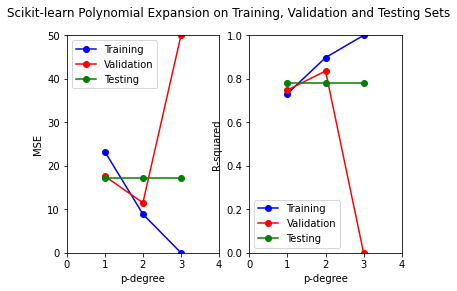

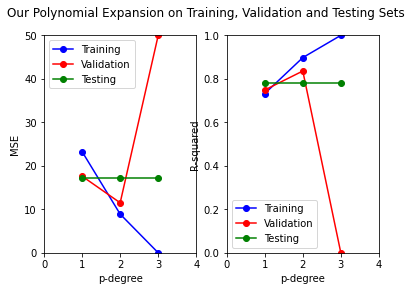

In [4]:
if __name__ == '__main__':

    boston_housing_data = skdata.load_boston()
    x = boston_housing_data.data
    y = boston_housing_data.target

    # 80 percent train, 10 percent validation, 10 percent test split
    train_idx = []
    val_idx = []
    test_idx = []
    for idx in range(x.shape[0]):
        if idx and idx % 10 == 9:
            val_idx.append(idx)
        elif idx and idx % 10 == 0:
            test_idx.append(idx)
        else:
            train_idx.append(idx)

    x_train, x_val, x_test = x[train_idx, :], x[val_idx, :], x[test_idx, :]
    y_train, y_val, y_test = y[train_idx], y[val_idx], y[test_idx]

    '''
    Trains and tests linear regression from scikit-learn
    '''
    # Variables to hold training, validation and testing scores for linear up to p-order polynomial expansion
    scores_mse_train = []
    scores_mse_val = []
    scores_mse_test = []
    scores_r2_train = []
    scores_r2_val = []
    scores_r2_test = []

    # Initialize scikit-learn linear regression model
    model = LinearRegression()

    # Trains scikit-learn linear regression model
    model.fit(x_train, y_train)

    print('Results using scikit-learn LinearRegression model with linear features')

    # Test model on training set
    predictions_train = model.predict(x_train)

    score_mse_train = skmetrics.mean_squared_error(predictions_train, y_train)
    print('Training set mean squared error: {:.4f}'.format(score_mse_train))

    score_r2_train = model.score(x_train, y_train)
    print('Training set r-squared scores: {:.4f}'.format(score_r2_train))

    # TODO: Save MSE and R-square scores on training set
    scores_mse_train.append(score_mse_train)
    scores_r2_train.append(score_r2_train)

    # Test model on validation set
    predictions_val = model.predict(x_val)

    score_mse_val = skmetrics.mean_squared_error(predictions_val, y_val)
    print('Validation set mean squared error: {:.4f}'.format(score_mse_val))

    score_r2_val = model.score(x_val, y_val)
    print('Validation set r-squared scores: {:.4f}'.format(score_r2_val))

    # TODO: Save MSE and R-square scores on validation set
    scores_mse_val.append(score_mse_val)
    scores_r2_val.append(score_r2_val)

    # Test model on testing set
    predictions_test = model.predict(x_test)

    score_mse_test = skmetrics.mean_squared_error(predictions_test, y_test)
    print('Testing set mean squared error: {:.4f}'.format(score_mse_test))

    score_r2_test = model.score(x_test, y_test)
    print('Testing set r-squared scores: {:.4f}'.format(score_r2_test))

    # TODO: Save MSE and R-square scores on testing set
    scores_mse_test.append(score_mse_test)
    scores_r2_test.append(score_r2_test)

    # TODO: Set the degrees/orders of polynomials to be 2 and 3 for nonlinear mapping
    degrees_polynomial = [2, 3]

    '''
    Trains and tests linear regression from scikit-learn with scikit-learn polynomial features
    '''
    for degree in degrees_polynomial:

        print('Results of LinearRegression model using scikit-learn order-{} polynomial expansion features'.format(degree))

        # TODO: Initialize polynomial expansion
        poly_transform = skpreprocess.PolynomialFeatures(degree=degree)

        # TODO: Compute the polynomial terms needed for the data
        # Generates x_1^2, x_1 x_2, x_1 x_3, ..., x_d^2
        poly_transform.fit(x_train)

        # TODO: Transform the data by nonlinear mapping
        # Applies all the polynomial terms to the data and augments it to x
        # Computes the values for x_0, x_1, x_2, ..., x_1^2, x_1 x_2, ... x_d^2
        # x_1 = 2, x_2 = 4 : x -> (1, 2, 4, ..., 4, 8, ..., x_d^2)
        x_poly_train = poly_transform.transform(x_train)
        x_poly_val = poly_transform.transform(x_val)
        x_poly_test = poly_transform.transform(x_test)

        # Initialize scikit-learn linear regression model
        model_poly = LinearRegression()

        # TODO: Trains scikit-learn linear regression model using p-order polynomial expansion
        model_poly.fit(x_poly_train, y_train)

        # TODO: Test model on training set
        predictions_poly_train = model_poly.predict(x_poly_train)

        score_mse_poly_train = skmetrics.mean_squared_error(predictions_poly_train, y_train)
        print('Training set mean squared error: {:.4f}'.format(score_mse_poly_train))

        score_r2_poly_train = model_poly.score(x_poly_train, y_train)
        print('Training set r-squared scores: {:.4f}'.format(score_r2_poly_train))

        # TODO: Save MSE and R-square scores on training set
        scores_mse_train.append(score_mse_poly_train)
        scores_r2_train.append(score_r2_poly_train)

        # TODO: Test model on validation set
        predictions_poly_val = model_poly.predict(x_poly_val)

        score_mse_poly_val = skmetrics.mean_squared_error(predictions_poly_val, y_val)
        print('Validation set mean squared error: {:.4f}'.format(score_mse_poly_val))

        score_r2_poly_val = model_poly.score(x_poly_val, y_val)
        print('Validation set r-squared scores: {:.4f}'.format(score_r2_poly_val))

        # TODO: Save MSE and R-square scores on validation set
        scores_mse_val.append(score_mse_poly_val)
        scores_r2_val.append(score_r2_poly_val)

        # TODO: Test model on testing set
        predictions_poly_test = model_poly.predict(x_poly_test)

        score_mse_poly_test = skmetrics.mean_squared_error(predictions_poly_test, y_test)
        print('Testing set mean squared error: {:.4f}'.format(score_mse_poly_test))

        score_r2_poly_test = model_poly.score(x_poly_test, y_test)
        print('Testing set r-squared scores: {:.4f}'.format(score_r2_poly_test))

        # TODO: Save MSE and R-square scores on testing set
        scores_mse_test.append(score_mse_test)
        scores_r2_test.append(score_r2_test)

    # TODO: Convert each scores to NumPy arrays
    scores_mse_train = np.array(scores_mse_train)
    scores_mse_val = np.array(scores_mse_val)
    scores_mse_test = np.array(scores_mse_test)
    scores_r2_train = np.array(scores_r2_train)
    scores_r2_val = np.array(scores_r2_val)
    scores_r2_test = np.array(scores_r2_test)

    # TODO: Clip each set of MSE scores between 0 and 50
    scores_mse_train = np.clip(scores_mse_train, 0.0, 50.0)
    scores_mse_val = np.clip(scores_mse_val, 0.0, 50.0)
    scores_mse_test = np.clip(scores_mse_test, 0.0, 50.0)

    # TODO: Clip each set of R-squared scores between 0 and 1
    scores_r2_train = np.clip(scores_r2_train, 0.0, 1.0)
    scores_r2_val = np.clip(scores_r2_val, 0.0, 1.0)
    scores_r2_test = np.clip(scores_r2_test, 0.0, 1.0)

    n_experiments = len(scores_mse_train)

    # TODO: Create figure for training, validation and testing scores for different features
    fig = plt.figure()

    # TODO: Create subplot for MSE for training, validation, testing
    ax = fig.add_subplot(1, 2, 1)

    x_values = [range(1, n_experiments + 1)] * n_experiments
    y_values = [scores_mse_train, scores_mse_val, scores_mse_test]
    labels = ['Training', 'Validation', 'Testing']
    colors = ['blue', 'red', 'green']

    # TODO: Plot MSE scores for training, validation, testing sets
    for x, y, label, color in zip(x_values, y_values, labels, colors):
        ax.plot(x, y, marker='o', color=color, label=label)
        ax.legend(loc='best')

    # TODO: Set y limits between 0 and 50, set x limits to 0 to number experiments + 1
    ax.set_ylim([0.0, 50.0])
    ax.set_xlim([0.0, n_experiments + 1])

    # TODO: Set y label to 'MSE', set x label to 'p-degree'
    ax.set_ylabel('MSE')
    ax.set_xlabel('p-degree')

    # TODO: Create subplot for R-square for training, validation, testing
    ax = fig.add_subplot(1, 2, 2)

    x_values = [range(1, n_experiments + 1)] * n_experiments
    y_values = [scores_r2_train, scores_r2_val, scores_r2_test]
    labels = ['Training', 'Validation', 'Testing']
    colors = ['blue', 'red', 'green']

    # TODO: Plot R-squared scores for training, validation, testing sets
    for x, y, label, color in zip(x_values, y_values, labels, colors):
        ax.plot(x, y, marker='o', color=color, label=label)
        ax.legend(loc='best')

    # TODO: Set y limits between 0 and 1, set x limits to 0 to number experiments + 1
    ax.set_ylim([0.0, 1.0])
    ax.set_xlim([0.0, n_experiments + 1])

    # TODO: Set y label to 'R-squared', set x label to 'p-degree'
    ax.set_ylabel('R-squared')
    ax.set_xlabel('p-degree')

    # TODO: Create super title 'Scikit-learn Polynomial Expansion on Training, Validation and Testing Sets'
    plt.suptitle('Scikit-learn Polynomial Expansion on Training, Validation and Testing Sets')

    '''
    Trains and tests linear regression from scikit-learn with our implementation of polynomial features
    '''
    # TODO: Instantiate lists containing the training, validation and testing
    # MSE and R-squared scores obtained from linear regression without nonlinear mapping
    scores_mse_poly_train = []
    scores_mse_poly_val = []
    scores_mse_poly_test = []
    scores_r2_poly_train = []
    scores_r2_poly_val = []
    scores_r2_poly_test = []

    for degree in degrees_polynomial:

        print('Results for LinearRegression model using our implementation of order-{} polynomial expansion features'.format(degree))

        # TODO: Transform the data by nonlinear mapping using our implementation of polynomial expansion
        poly_transform = PolynomialFeatureExpansion(degree)
        
        x_poly_train = poly_transform.transform(x_train)
        x_poly_val = poly_transform.transform(x_val)
        x_poly_test = poly_transform.transform(x_test)

        # Initialize scikit-learn linear regression model
        model_poly = LinearRegression()

        # TODO: Trains scikit-learn linear regression model using p-order polynomial expansion
        model_poly.fit(x_poly_train, y_train)

        # TODO: Test model on training set
        predictions_poly_train = model_poly.predict(x_poly_train)

        score_mse_poly_train = skmetrics.mean_squared_error(predictions_poly_train, y_train)
        print('Training set mean squared error: {:.4f}'.format(score_mse_poly_train))

        score_r2_poly_train = model_poly.score(x_poly_train, y_train)
        print('Training set r-squared scores: {:.4f}'.format(score_r2_poly_train))

        # TODO: Save MSE and R-square scores on training set
        scores_mse_poly_train.append(score_mse_poly_train)
        scores_r2_poly_train.append(score_r2_poly_train)

        # TODO: Test model on validation set
        predictions_poly_val = model_poly.predict(x_poly_val)

        score_mse_poly_val = skmetrics.mean_squared_error(predictions_poly_val, y_val)
        print('Validation set mean squared error: {:.4f}'.format(score_mse_poly_val))

        score_r2_poly_val = model_poly.score(x_poly_val, y_val)
        print('Validation set r-squared scores: {:.4f}'.format(score_r2_poly_val))

        # TODO: Save MSE and R-square scores on validation set
        scores_mse_poly_val.append(score_mse_poly_val)
        scores_r2_poly_val.append(score_r2_poly_val)

        # TODO: Test model on testing set
        predictions_poly_test = model_poly.predict(x_poly_test)

        score_mse_poly_test = skmetrics.mean_squared_error(predictions_poly_test, y_test)
        print('Testing set mean squared error: {:.4f}'.format(score_mse_poly_test))

        score_r2_poly_test = model_poly.score(x_poly_test, y_test)
        print('Testing set r-squared scores: {:.4f}'.format(score_r2_poly_test))

        # TODO: Save MSE and R-square scores on testing set
        scores_mse_poly_test.append(score_mse_poly_test)
        scores_r2_poly_test.append(score_r2_poly_test)

    # TODO: Convert each scores to NumPy arrays
    scores_mse_train = np.array(scores_mse_train)
    scores_mse_val = np.array(scores_mse_val)
    scores_mse_test = np.array(scores_mse_test)
    scores_r2_train = np.array(scores_r2_train)
    scores_r2_val = np.array(scores_r2_val)
    scores_r2_test = np.array(scores_r2_test)

    # TODO: Clip each set of MSE scores between 0 and 50
    scores_mse_train = np.clip(scores_mse_train, 0.0, 50.0)
    scores_mse_val = np.clip(scores_mse_val, 0.0, 50.0)
    scores_mse_test = np.clip(scores_mse_test, 0.0, 50.0)

    # TODO: Clip each set of R-squared scores between 0 and 1
    scores_r2_train = np.clip(scores_r2_train, 0.0, 1.0)
    scores_r2_val = np.clip(scores_r2_val, 0.0, 1.0)
    scores_r2_test = np.clip(scores_r2_test, 0.0, 1.0)

    n_experiments = len(scores_mse_train)

    # TODO: Create figure for training, validation and testing scores for different features
    fig = plt.figure()

    # TODO: Create subplot for MSE for training, validation, testing
    ax = fig.add_subplot(1, 2, 1)

    x_values = [range(1, n_experiments + 1)] * n_experiments
    y_values = [scores_mse_train, scores_mse_val, scores_mse_test]
    labels = ['Training', 'Validation', 'Testing']
    colors = ['blue', 'red', 'green']

    # TODO: Plot MSE scores for training, validation, testing sets
    for x, y, label, color in zip(x_values, y_values, labels, colors):
        ax.plot(x, y, marker='o', color=color, label=label)
        ax.legend(loc='best')

    # TODO: Set y limits between 0 and 50, set x limits to 0 to number experiments + 1
    ax.set_ylim([0.0, 50.0])
    ax.set_xlim([0.0, n_experiments + 1])

    # TODO: Set y label to 'MSE', set x label to 'p-degree'
    ax.set_ylabel('MSE')
    ax.set_xlabel('p-degree')

    # TODO: Create subplot for R-square for training, validation, testing
    ax = fig.add_subplot(1, 2, 2)

    x_values = [range(1, n_experiments + 1)] * n_experiments
    y_values = [scores_r2_train, scores_r2_val, scores_r2_test]
    labels = ['Training', 'Validation', 'Testing']
    colors = ['blue', 'red', 'green']

    # TODO: Plot R-squared scores for training, validation, testing sets
    for x, y, label, color in zip(x_values, y_values, labels, colors):
        ax.plot(x, y, marker='o', color=color, label=label)
        ax.legend(loc='best')

    # TODO: Set y limits between 0 and 1, set x limits to 0 to number experiments + 1
    ax.set_ylim([0.0, 1.0])
    ax.set_xlim([0.0, n_experiments + 1])

    # TODO: Set y label to 'R-squared', set x label to 'p-degree'
    ax.set_ylabel('R-squared')
    ax.set_xlabel('p-degree')

    # TODO: Create super title 'Our Polynomial Expansion on Training, Validation and Testing Sets'
    plt.suptitle('Our Polynomial Expansion on Training, Validation and Testing Sets')

    plt.show()